# Import Libraries

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline

# Load CSV file

In [2]:
dataset = pd.read_csv('ANZ synthesised transaction dataset.csv')

In [3]:
dataset.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


# Exploratory Data Analysis

# Missing Data

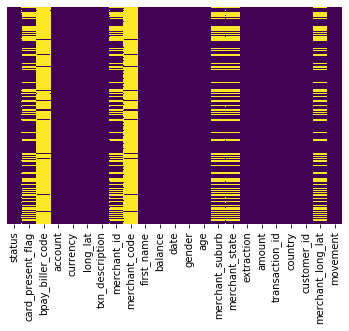

In [4]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Droping of Columns

In [5]:
dataset=dataset.drop(['card_present_flag', 'bpay_biller_code', 'account', 'currency', 'long_lat', 'merchant_id', 'merchant_code', 'first_name', 'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id', 'country', 'merchant_long_lat'], axis=1)

In [6]:
dataset = dataset.reindex(columns=['status', 'customer_id', 'txn_description', 'balance', 'amount',
                                  'date', 'gender', 'age', 'movement'])

In [7]:
dataset.head()

,status,customer_id,txn_description,balance,amount,date,gender,age,movement
0,authorized,CUS-2487424745,POS,35.39,16.25,01/08/2018,F,26,debit
1,authorized,CUS-2487424745,SALES-POS,21.20,14.19,01/08/2018,F,26,debit
2,authorized,CUS-2142601169,POS,5.71,6.42,01/08/2018,M,38,debit
3,authorized,CUS-1614226872,SALES-POS,2117.22,40.90,01/08/2018,F,40,debit
4,authorized,CUS-2487424745,SALES-POS,17.95,3.25,01/08/2018,F,26,debit


# Target Variable

In [8]:
dataset['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

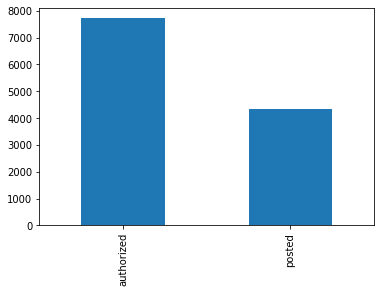

In [9]:
dataset['status'].value_counts().plot.bar()

# Independent Variable (Categorical)

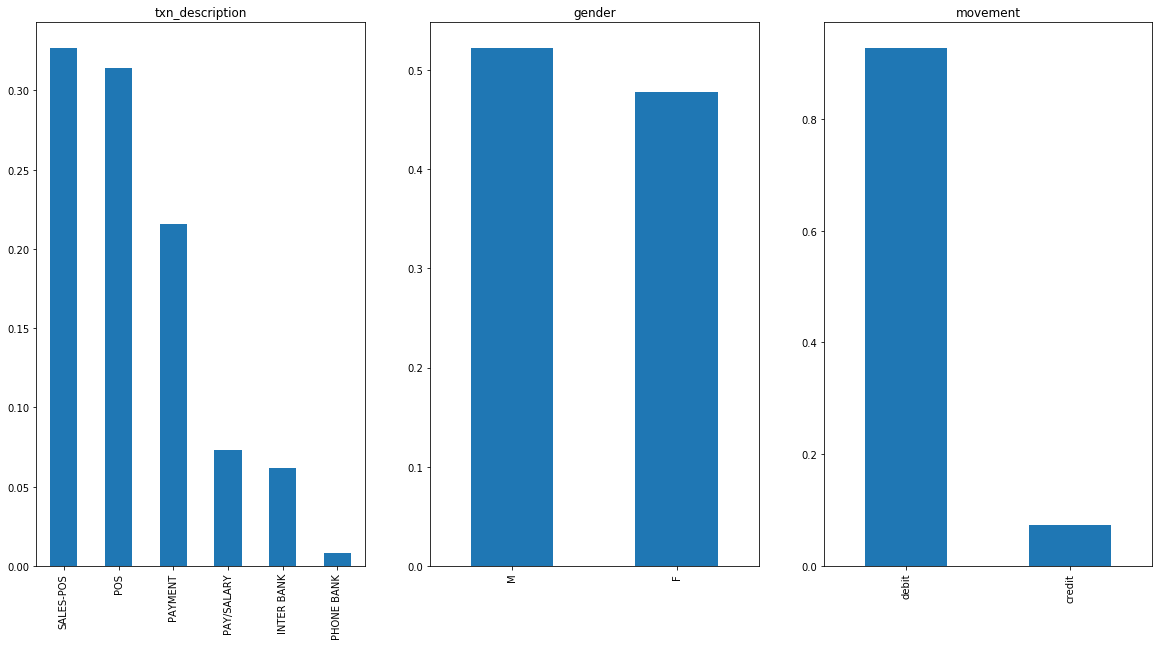

In [10]:
plt.figure(1)

#txn_description
plt.subplot(131) 
dataset['txn_description'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'txn_description') 
 
#gender
plt.subplot(132)
dataset['gender'].value_counts(normalize=True).plot.bar(title= 'gender') 

#movement
plt.subplot(133) 
dataset['movement'].value_counts(normalize=True).plot.bar(title= 'movement') 
plt.show()

# Independent Variable (Numerical)

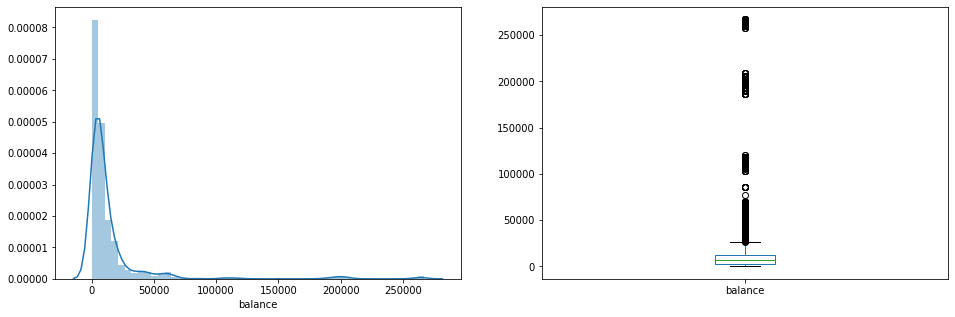

In [11]:
#balance
plt.figure(1) 
plt.subplot(121) 
sns.distplot(dataset['balance'])
plt.subplot(122) 
dataset['balance'].plot.box(figsize=(16,5)) 
plt.show()

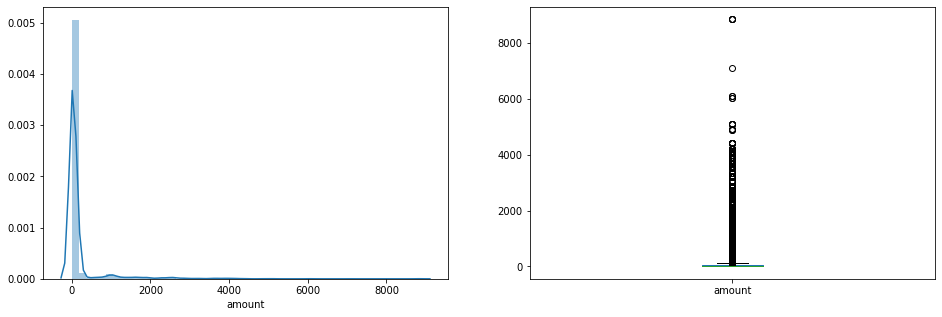

In [12]:
#amount
plt.subplot(121) 
sns.distplot(dataset['amount'])
plt.subplot(122) 
dataset['amount'].plot.box(figsize=(16,5)) 
plt.show()

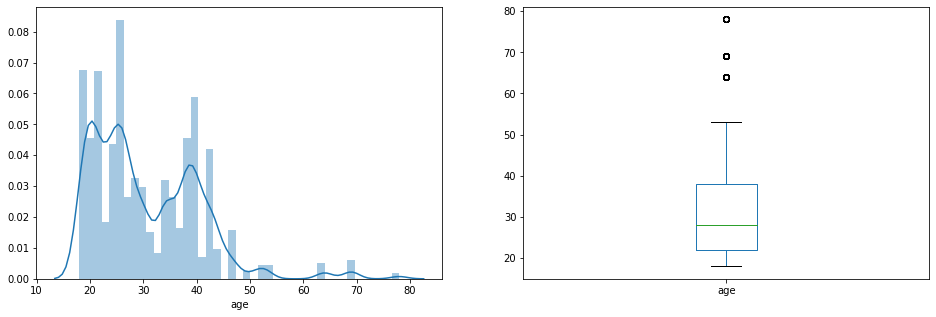

In [13]:
#age
plt.subplot(121) 
sns.distplot(dataset['age']).figsize=(20,10)
plt.subplot(122) 
dataset['age'].plot.box(figsize=(16,5)) 
plt.show()

# Categorical Independent Variable vs Target Variable

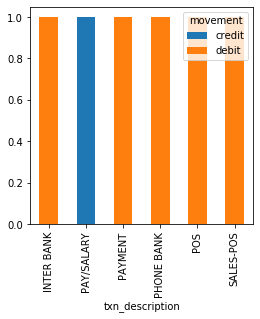

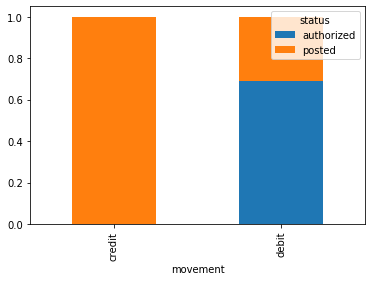

In [17]:
txn_description=pd.crosstab(dataset['txn_description'],dataset['movement'])
# gender=pd.crosstab(dataset['gender'],dataset['status']) 
movement=pd.crosstab(dataset['movement'],dataset['status']) 

txn_description.div(txn_description.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
# gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
# plt.show() 
movement.div(movement.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 